In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import seaborn as sns

In [2]:
wine_feature = pd.DataFrame(load_wine().data, columns=load_wine().feature_names)

In [3]:
wine_feature.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [4]:
wine_feature["class"] = load_wine().target

In [5]:
wine_feature["class"].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(wine_feature.iloc[:, :-1], wine_feature.iloc[:, -1], test_size=0.2, random_state=69)

In [7]:
x_train.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
52     13.82        1.75  2.42               14.0      111.0           3.88   
118    12.77        3.43  1.98               16.0       80.0           1.63   
89     12.08        1.33  2.30               23.6       70.0           2.20   
72     13.49        1.66  2.24               24.0       87.0           1.88   
101    12.60        1.34  1.90               18.5       88.0           1.45   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
52         3.74                  0.32             1.87             7.05  1.01   
118        1.25                  0.43             0.83             3.40  0.70   
89         1.59                  0.42             1.38             1.74  1.07   
72         1.84                  0.27             1.03             3.74  0.98   
101        1.36                  0.29             1.35             2.45  1.04   

     od280/od315_of_diluted_wines  proline  
52                           3.26   1190.0  
118                          2.12    372.0  
89                           3.21    625.0  
72                           2.78    472.0  
101                          2.77    562.0

In [8]:
y_train.head()

52     0
118    1
89     1
72     1
101    1
Name: class, dtype: int64

In [9]:
y_train.value_counts()

class
1    57
0    47
2    38
Name: count, dtype: int64

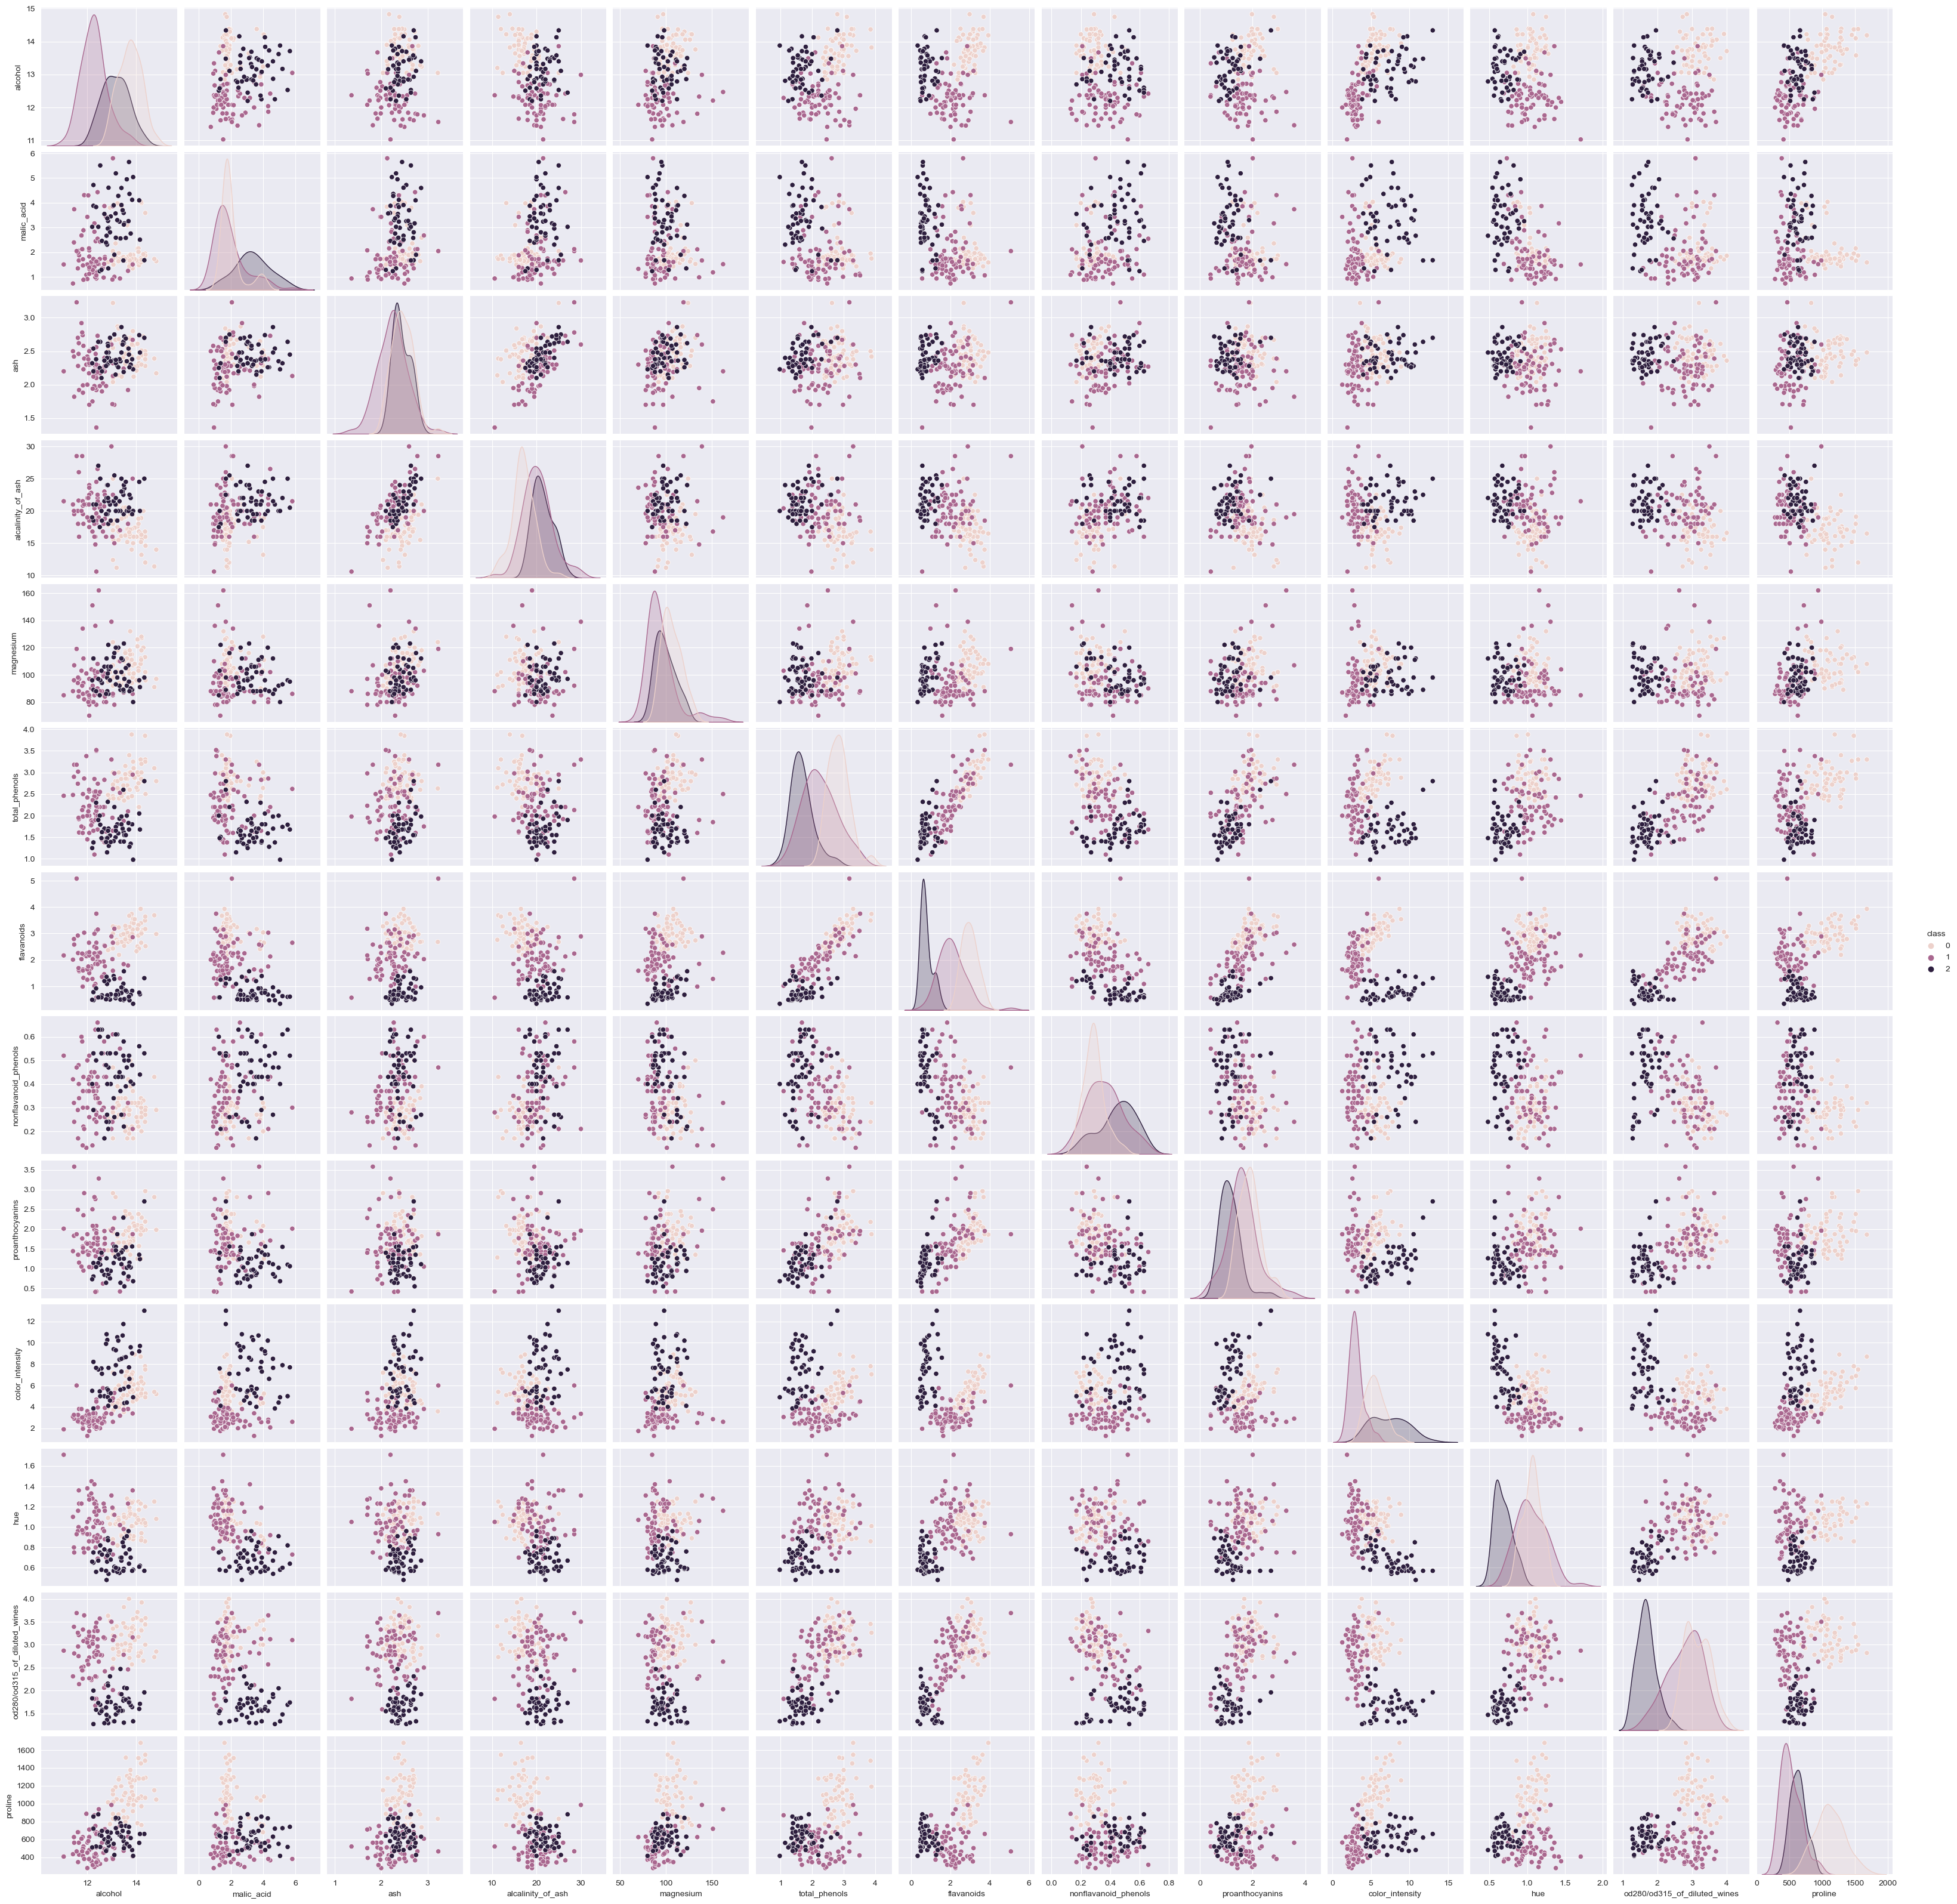

In [10]:
sns.pairplot(wine_feature, hue="class")
plt.show()

In [11]:
index_2 = np.where(wine_feature["class"] == 2)

In [12]:
wine_feature.drop(index=index_2[0], inplace=True)

In [13]:
wine_feature["class"].value_counts()

class
1    71
0    59
Name: count, dtype: int64

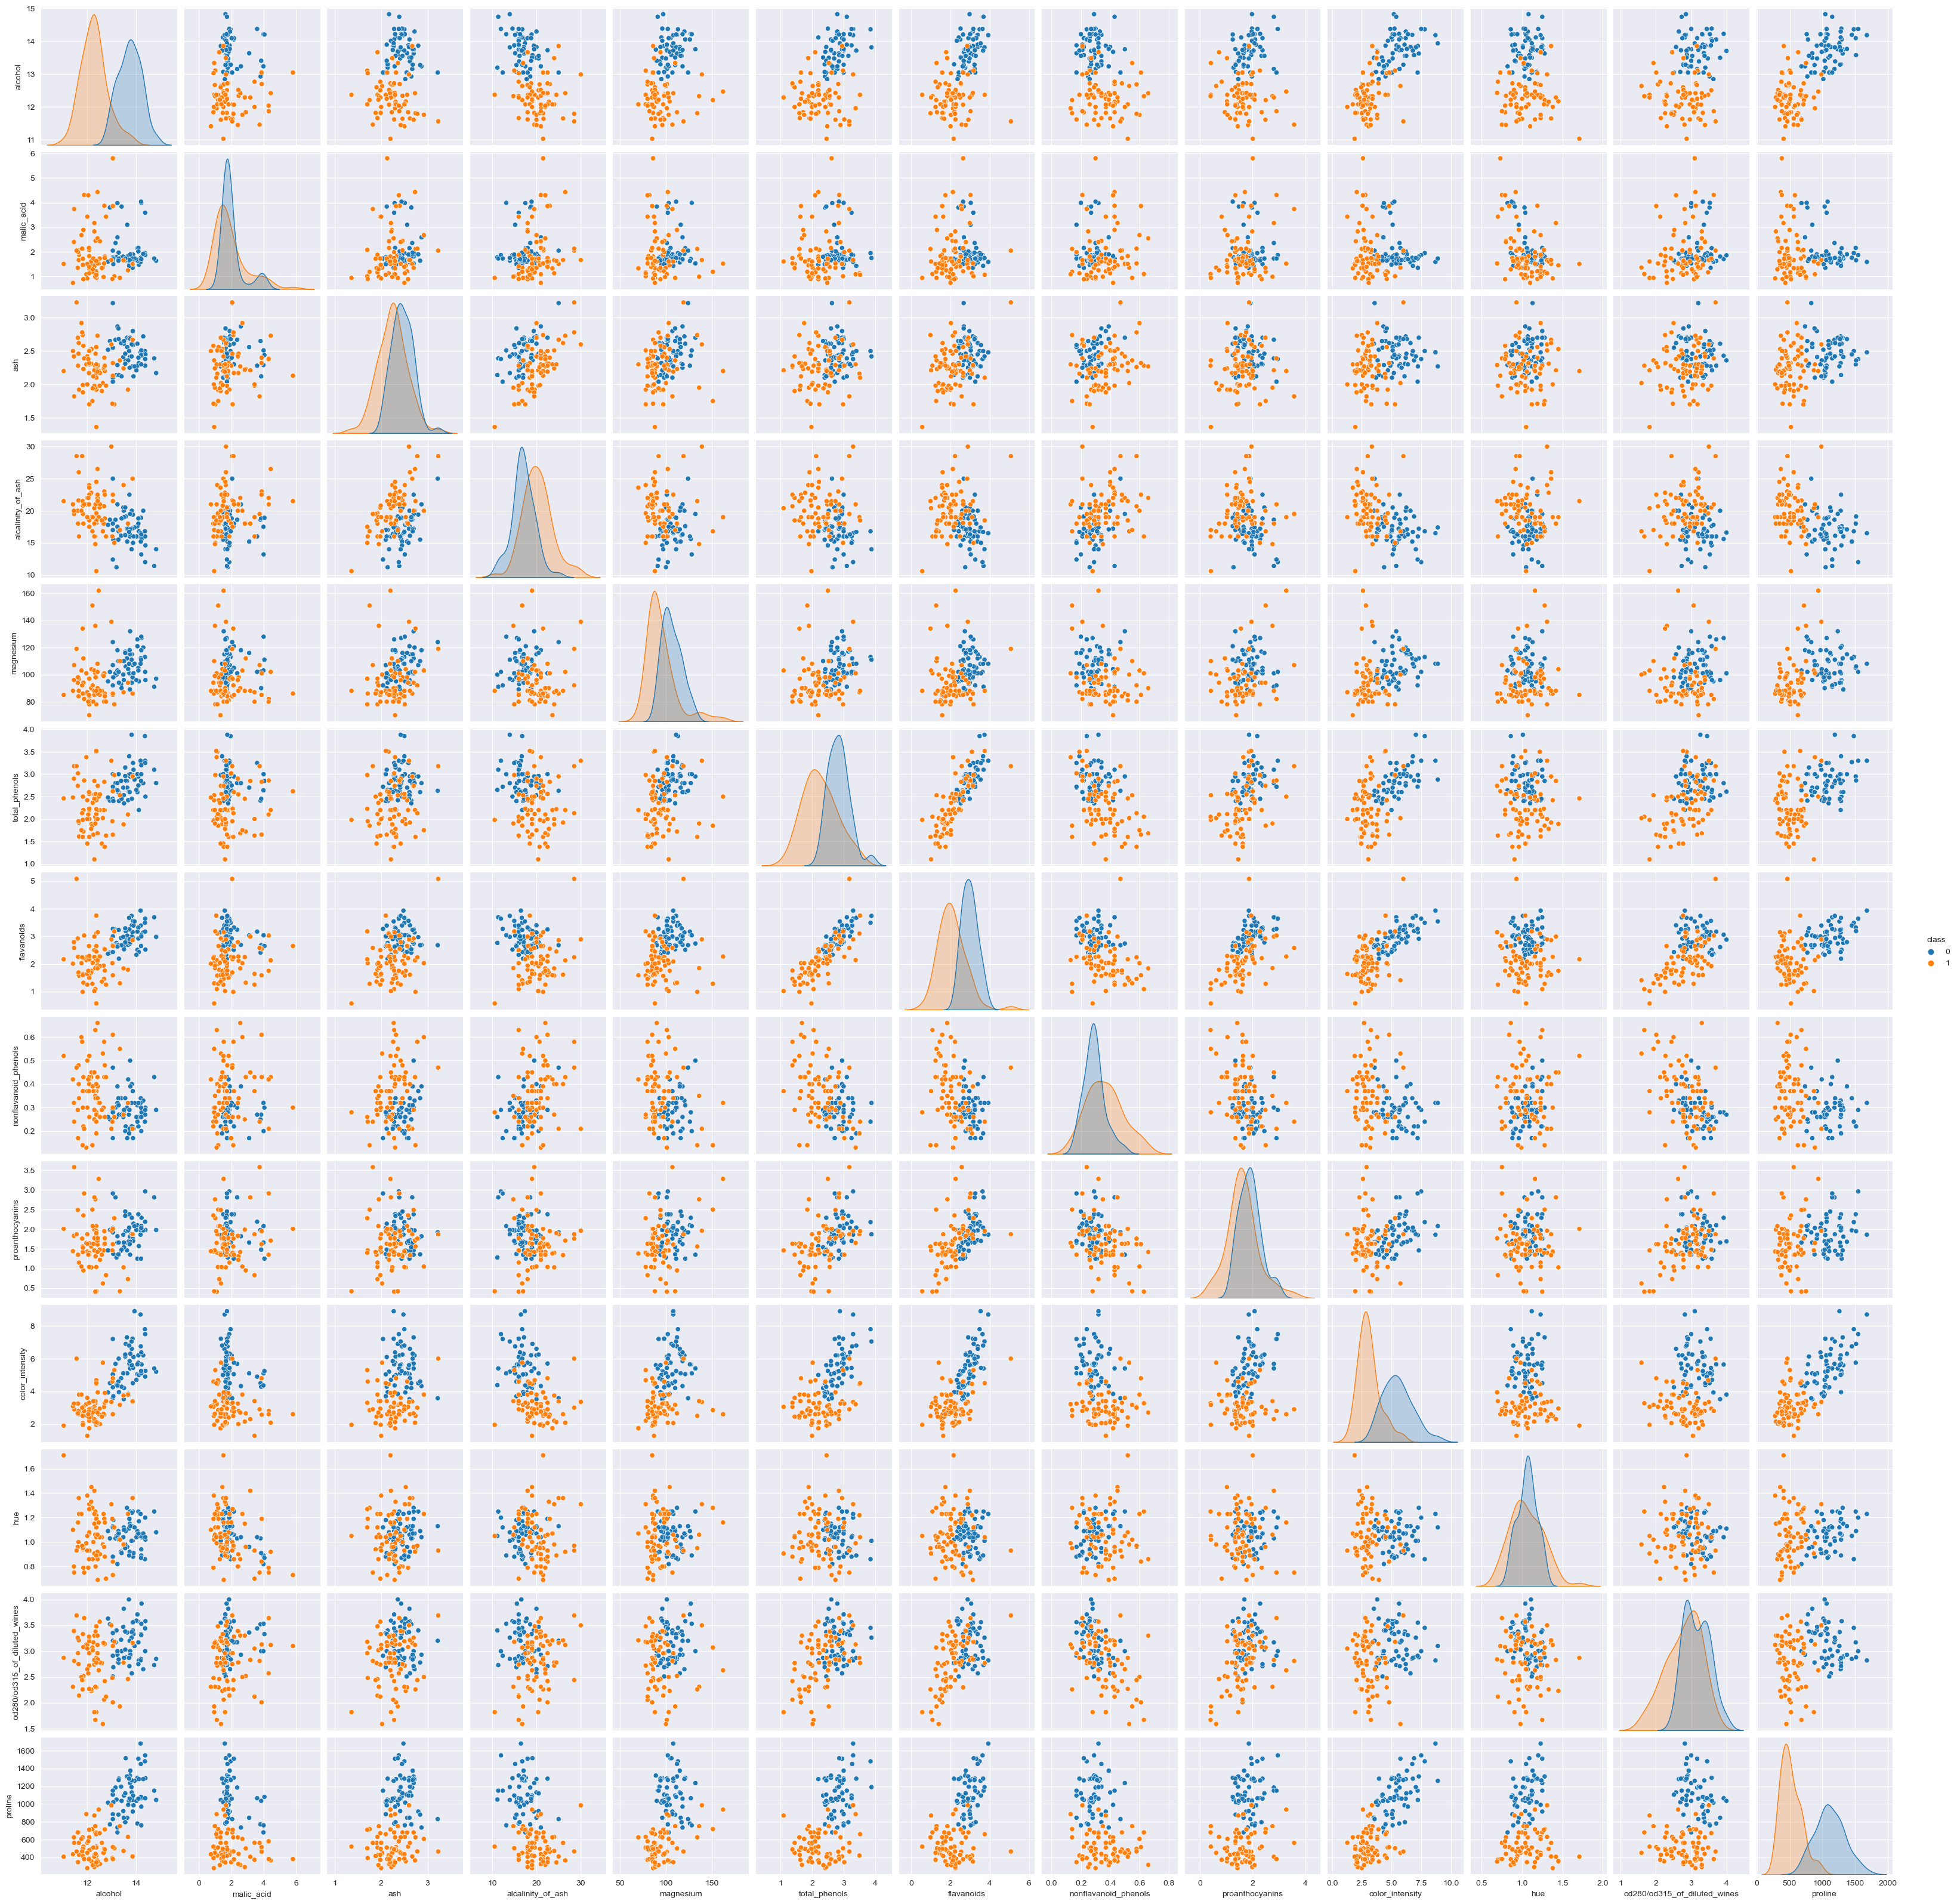

In [14]:
sns.pairplot(wine_feature, hue="class")
plt.show()

In [14]:
class Perceptron:
    def __init__(self, eta=0.01, epochs=1000):
        self.epochs = epochs
        self.eta = eta
        self.weights = np.ones(len(x_train.columns))
        self.bias = 1